# Depths and Snow Pit Data Package Contents

In [1]:
# standard imports
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# unique imports
import s3fs #access data from the AWS s3 bucket

From the SnowEx20 [Depth Probe Landing Page](https://nsidc.org/data/SNEX20_SD/versions/1), you can download data and access the [User's Guide](https://nsidc.org/sites/nsidc.org/files/SNEX20_SD-V001-UserGuide_1.pdf)
<img src="images/SD-landingPage.png">

The Community Snow Depth Probe data package is a single CSV with over 37,000 geolocated snow depths! Three different instruments were used the measure depths and are recorded in the Measurement Tool column.

## Method 1: Programmatically download snow depth data from NSIDC

In [ ]:
%run './scripts/nsidc-download_SNEX20_SD.001.py' #test
print('Grand Mesa 2020 Snow Depth data download complete') 

In [ ]:
# show filename:
path = Path('./data/depths/')

for filename in path.glob('*.csv'):
    print(filename.name)

## Method 2: Access data from the S3 bucket
Quick and easy access for hackweek or if you haven't gone through the steps to [configure programmatic access](https://snowex-hackweek.github.io/website/preliminary/earthdata.html#configure-programmatic-access-to-nasa-servers) to NASA servers yet. 

In [2]:
# Uses AWS credentials on machine
fs = s3fs.S3FileSystem() 

# which data bucket?
bucket = 'snowex-data'  

# show bucket list, we want the last item in the list
print('AWS S3 bucket list: ', fs.ls(bucket))
      
# contents inside /depths     
file_list = fs.ls(f'{bucket}/tutorial-data/core-datasets/depths') 

# show filename
print('File list is: ', file_list)

AWS S3 bucket list:  ['snowex-data/README.txt', 'snowex-data/asf_vertex.png', 'snowex-data/tutorial-data']
File list is:  ['snowex-data/tutorial-data/core-datasets/depths/SnowEx2020_SnowDepths_COGM_alldepths_v01.csv']


## Read the File and Prep Data Analysis

In [3]:
# open depth data file, and create pandas dataframe
with fs.open(file_list[0], 'rb') as f: 
    df = pd.read_csv(f, sep=',', header=0, parse_dates=[[2,3]]) #parse the date[2] and time[3] columns

# rename some columns for ease further down
df.rename(columns = {
    'Measurement Tool (MP = Magnaprobe; M2 = Mesa 2; PR = Pit Ruler)':'Measurement Tool', 
    'Date (yyyymmdd)_Time (hh:mm, local, MST)': "Datetime"},
          inplace = True)

df.head()

,Datetime,Measurement Tool,ID,PitID,Longitude,Latitude,Easting,Northing,Depth (cm),elevation (m),equipment,Version Number
0,2020-01-28 11:48:00,MP,100000,8N58,-108.13515,39.03045,747987.62,4324061.71,94,3148.2,CRREL_B,1
1,2020-01-28 11:48:00,MP,100001,8N58,-108.13516,39.03045,747986.75,4324061.68,74,3148.3,CRREL_B,1
2,2020-01-28 11:48:00,MP,100002,8N58,-108.13517,39.03045,747985.89,4324061.65,90,3148.2,CRREL_B,1
3,2020-01-28 11:48:00,MP,100003,8N58,-108.13519,39.03044,747984.19,4324060.49,87,3148.6,CRREL_B,1
4,2020-01-28 11:48:00,MP,100004,8N58,-108.13519,39.03042,747984.26,4324058.27,90,3150.1,CRREL_B,1


In [4]:
# Locate all depths taken with Pit Ruler (PR)
r = df.loc[df['Measurement Tool'] == 'PR']
r.head()

,Datetime,Measurement Tool,ID,PitID,Longitude,Latitude,Easting,Northing,Depth (cm),elevation (m),equipment,Version Number
37754,2020-03-12 14:45:00,PR,300000,Skyway Tree,-108.06311,39.04496,754173.00,4325871.00,83,3253.169922,ruler,1
37755,2020-01-30 11:24:00,PR,300001,7C15,-108.19593,39.04563,742673.94,4325582.37,100,3048.699951,ruler,1
37756,2020-01-29 15:00:00,PR,300002,6C37,-108.14791,39.00760,746962.00,4321491.00,117,3087.709961,ruler,1
37757,2020-02-09 12:30:00,PR,300003,8C31,-108.16401,39.02144,745520.00,4322983.00,98,3099.639893,ruler,1
37758,2020-01-28 09:13:00,PR,300004,6N18,-108.19103,39.03404,743137.23,4324309.43,92,3055.590088,ruler,1


In [9]:
# set up filter for IOP date range
start = pd.to_datetime('1/28/2020')
end   = pd.to_datetime('2/12/2020')

# add Date only column
r["Date"] = r['Datetime'].dt.date

# filter the IOP date range
r_IOP = r[(r['Date'] >= start) & (r['Date'] <= end)]

# r_IOP = pd.date_range(start='1/28/2020', end='2/12/2020', freq="D")
# IOP_dates[-1]
# r = pit_ruler_depths['Date'].loc[IOP_dates]
# r

# pit_ruler_depths = pit_ruler_depths.loc[IOP_dates]
# pit_ruler_depths

<ipython-input-9-021fb4f74915>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r["Date"] = r['Datetime'].dt.date


In [7]:
# start = pd.to_datetime('1/28/2020')
# end   = pd.to_datetime('2/12/2020')
# r_IOP = r[(r['Date'] >= start) & (r['Date'] <= end)]

In [10]:
r_IOP

,Datetime,Measurement Tool,ID,PitID,Longitude,Latitude,Easting,Northing,Depth (cm),elevation (m),equipment,Version Number,Date
37755,2020-01-30 11:24:00,PR,300001,7C15,-108.19593,39.04563,742673.94,4325582.37,100,3048.699951,ruler,1,2020-01-30
37756,2020-01-29 15:00:00,PR,300002,6C37,-108.14791,39.00760,746962.00,4321491.00,117,3087.709961,ruler,1,2020-01-29
37757,2020-02-09 12:30:00,PR,300003,8C31,-108.16401,39.02144,745520.00,4322983.00,98,3099.639893,ruler,1,2020-02-09
37758,2020-01-28 09:13:00,PR,300004,6N18,-108.19103,39.03404,743137.23,4324309.43,92,3055.590088,ruler,1,2020-01-28
37759,2020-02-12 10:44:00,PR,300005,FL1B,-108.17417,39.02193,744639.00,4323010.00,100,3088.149902,ruler,1,2020-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37916,2020-02-04 13:40:00,PR,300162,5S29,-108.16532,39.01801,745419.00,4322599.00,110,3094.260010,ruler,1,2020-02-04
37917,2020-01-29 14:00:00,PR,300163,6S19,-108.18073,39.01846,744083.00,4322607.00,139,3051.560059,ruler,1,2020-01-29
37918,2020-02-11 15:04:00,PR,300164,1N5,-108.21137,39.03618,741369.00,4324492.00,88,3031.800049,ruler,1,2020-02-11
37919,2020-02-01 08:40:00,PR,300165,2S37,-108.15929,39.01926,745936.51,4322753.96,104,3102.780029,ruler,1,2020-02-01


<AxesSubplot:xlabel='Easting', ylabel='Northing'>

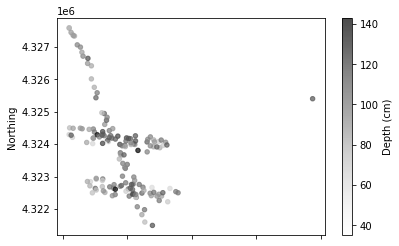

In [11]:
# pit_ruler_depths.plot(x=pit_ruler_depths['Easting'], y=pit_ruler_depths['Northing'])
r_IOP.plot(x='Easting', y='Northing', c='Depth (cm)', kind='scatter', alpha=0.7)

In [ ]:
# plot all MagnaProbe depths from the first lidar flight date (2/1/20201 (???confirm this!))

## Download snow pit data from NSIDC
From the SnowEx20 [Snow Pit Landing Page](https://nsidc.org/data/SNEX20_GM_SP/versions/1), you can download data and access the [User's Guide](https://nsidc.org/data/SNEX20_GM_SP/versions/1). 

<img src="images/SP-landingPage.png">



In [1]:
# load snow pit data
%run 'scripts/nsidc-download_SNEX20_GM_SP.001.py'
print('Grand Mesa 2020 Snow Pit data download complete')

Querying for data:
	https://cmr.earthdata.nasa.gov/search/granules.json?provider=NSIDC_ECS&sort_key[]=start_date&sort_key[]=producer_granule_id&scroll=true&page_size=2000&short_name=SNEX20_GM_SP&version=001&version=01&version=1&temporal[]=2020-01-27T00:00:00Z,2020-02-12T23:59:59Z&options[producer_granule_id][pattern]=true&producer_granule_id[]=*5N19*

Found 1 matches.
netrc error: ~/.netrc access too permissive: access permissions must restrict access to only the owner (/home/jovyan/.netrc, line 1)


Earthdata username:  meganmason
password:  ·············


01/20: ./data/pits/SnowEx20_SnowPits_GMIOP_20200128_5N19_book1_v01.jpg
  [===============                                             ]  25%  7.5MB/s   [==============================                              ]  50%  10.6MB/s   [=============================================               ]  75%  12.4MB/s   [============================================================] 100%  14.9MB/s   
02/20: ./data/pits/SnowEx20_SnowPits_GMIOP_20200128_5N19_book2_v01.jpg
  [===============                                             ]  25%  7.0MB/s    [==============================                              ]  50%  9.9MB/s   [=============================================               ]  75%  11.5MB/s   [============================================================] 100%  12.7MB/s   
03/20: ./data/pits/SnowEx20_SnowPits_GMIOP_20200128_5N19_book_v01.jpg
  [============                                                ]  20%  7.2MB/s   [========================                                   

In [ ]:
path = Path('./data/pits/')

for i, filename in enumerate(path.glob('*5N19*')):
    print(i, filename.name)

In [ ]:
fs = s3fs.S3FileSystem() # Uses AWS credentials on machine
bucket = 'snowex-data' # grab from the s3 snowex-data bucket
print(fs.ls(bucket))

In [ ]:
images = fs.ls(f'{bucket}/tutorial-data/core-datasets/')
images

In [ ]:
with fs.open('/snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_5N19_temperature_v01.csv', 'rb') as f:
#     df = pd.DataFrame(f)
    d = pd.read_csv(f, header=7)
d
#     display(Images(data=f.read()))

In [ ]:
with fs.open('/snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_5N19_density_v01.csv', 'rb') as f:
#     df = pd.DataFrame(f)
    d = pd.read_csv(f, header=7)
d